In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np


#데이터를 불러 옵니다.
df = pd.read_csv("../data/house_train.csv")


#데이터를 미리 살펴 보겠습니다.
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
#카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.(12장 3절)
df = pd.get_dummies(df)


#결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다.
df = df.fillna(df.mean())


#업데이트된 데이터프레임을 출력해 봅니다.
df


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [3]:
#집 값을 제외한 나머지 열을 저장합니다.
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]


#집 값을 저장합니다.
y = df['SalePrice'].values

In [4]:
#전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)


In [8]:
#모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.summary()


#모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')


# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)


# 모델의 이름을 정합니다.
modelpath="../data/model/Ch15-house.hdf5"


# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)


#실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               3072      
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 175,617
Trainable params: 175,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
28/28 [============================

In [9]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []


# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 [==============================] - 0s 2ms/step
실제가격: 128000.00, 예상가격: 128387.09
실제가격: 82000.00, 예상가격: 110053.95
실제가격: 224900.00, 예상가격: 191334.38
실제가격: 120500.00, 예상가격: 75311.20
실제가격: 424870.00, 예상가격: 319319.38
실제가격: 340000.00, 예상가격: 271701.59
실제가격: 188700.00, 예상가격: 149405.67
실제가격: 146800.00, 예상가격: 161190.08
실제가격: 245350.00, 예상가격: 254469.38
실제가격: 153000.00, 예상가격: 168868.77
실제가격: 120000.00, 예상가격: 93576.18
실제가격: 153500.00, 예상가격: 237384.00
실제가격: 236500.00, 예상가격: 218806.39
실제가격: 237000.00, 예상가격: 223705.03
실제가격: 192500.00, 예상가격: 190471.97
실제가격: 150000.00, 예상가격: 142441.33
실제가격: 148000.00, 예상가격: 173113.12
실제가격: 240000.00, 예상가격: 231228.36
실제가격: 105500.00, 예상가격: 122583.73
실제가격: 75500.00, 예상가격: 48871.57
실제가격: 313000.00, 예상가격: 261450.73
실제가격: 249700.00, 예상가격: 253322.03
실제가격: 169900.00, 예상가격: 130401.68
실제가격: 380000.00, 예상가격: 304290.97
실제가격: 144000.00, 예상가격: 156499.08


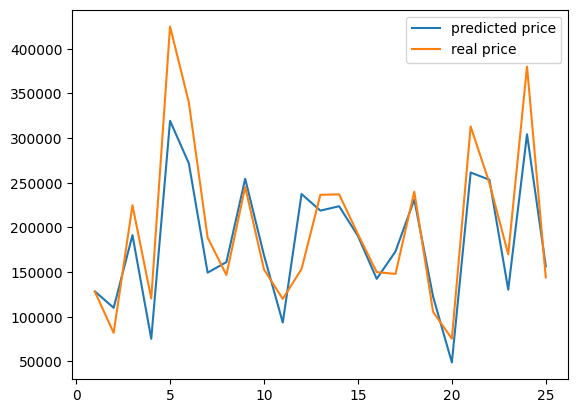

In [10]:
#그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.


plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()